In [1]:
import sys
sys.path.append("..")

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import math
import tensorflow as tf
import transforming_dynamics_model
import dynamics_model
import dynamics_subtractive_model

import tf_utils

In [2]:
from experiments.transforming import meansub_forward_model_autoencoder_train as trainer

In [3]:
tf.reset_default_graph()
conf = trainer.get_train_conf()
model = transforming_dynamics_model.DynamicsModel(conf)

setting up network
OrderedDict([('experiment_name', 'jointsig'), ('transform', 'meansub'), ('data', 'ftrs'), ('data_dir', '/home/ashvin/lsdc/pushing_data/finer_temporal_resolution_substep10'), ('sequence_length', 15), ('skip_frame', 2), ('context_frames', 2), ('use_state', 1), ('train_val_split', 1.0), ('batch_size', 32), ('learning_rate', 0.001), ('visualize', ''), ('file_visual', ''), ('discretize', 20), ('fsize', 100), ('masks', 0), ('run', 0), ('mu1', 0), ('mu2', 1e-06), ('mu3', 0.0001), ('seq', 0), ('autoencoder', True)])
using frame sequence:  [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
using frame sequence:  [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
image features: (batch, featsize) (32, 100)
done with network setup


In [4]:
f = model.get_f()

RESTORING FROM
/home/ashvin/tf-lsdc/tf-data/tf_models/experiment_name_jointsig/transform_meansub/data_ftrs/sequence_length_15/skip_frame_2/context_frames_2/use_state_1/train_val_split_1.0/batch_size_32/learning_rate_0.001/visualize_/file_visual_/discretize_20/fsize_100/masks_0/run_0/mu1_0/mu2_1e-06/mu3_0.0001/seq_0/autoencoder_True
Checkpoint found and restored: /home/ashvin/tf-lsdc/tf-data/tf_models/experiment_name_jointsig/transform_meansub/data_ftrs/sequence_length_15/skip_frame_2/context_frames_2/use_state_1/train_val_split_1.0/batch_size_32/learning_rate_0.001/visualize_/file_visual_/discretize_20/fsize_100/masks_0/run_0/mu1_0/mu2_1e-06/mu3_0.0001/seq_0/autoencoder_True/model-50000


In [5]:
result = model.run('test')[0]

In [6]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [7]:
a, image_data, action_data, reconstruction = result
A = action_data
print A.shape
print a.shape
print image_data.shape
print reconstruction.shape

(32, 15, 2)
(32, 2, 20)
(32, 15, 64, 64, 3)
(32, 64, 64, 3)


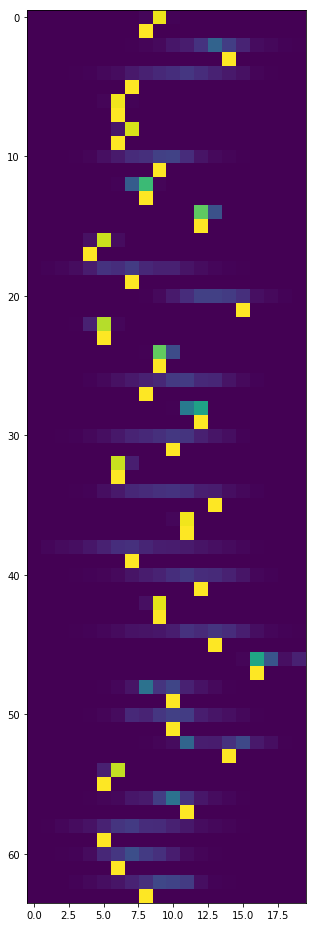

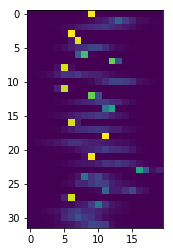

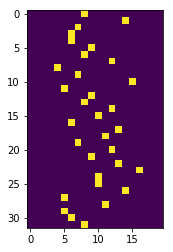

In [8]:
import discretize

B = 32
P = np.zeros((2*B, 20))
P1 = np.zeros((B, 20))
P2 = np.zeros((B, 20))
for b in range(B):
    P[2*b, :] = softmax(a[b, 0, :])
    P[2*b+1, :] = discretize.one_hot_encode(A[b, 0, 0], -10, 10, 20)
    P1[b, :] = softmax(a[b, 0, :])
    P2[b, :] = discretize.one_hot_encode(A[b, 0, 0], -10, 10, 20)

plt.figure(figsize=(5, 20))
plt.imshow(P)
plt.figure()
plt.imshow(P1)
plt.figure()
plt.imshow(P2)

In [9]:
print [v.name for v in tf.trainable_variables()]

[u'conv/conv1/weights:0', u'conv/conv1/biases:0', u'conv/conv2/weights:0', u'conv/conv2/biases:0', u'conv/conv3/weights:0', u'conv/conv3/biases:0', u'conv/conv4/weights:0', u'conv/conv4/biases:0', u'conv/fc5/weights:0', u'conv/fc5/biases:0', u'autodecoder/fc5/weights:0', u'autodecoder/fc5/biases:0', u'autodecoder/conv1/weights:0', u'autodecoder/conv1/biases:0', u'autodecoder/conv2/weights:0', u'autodecoder/conv2/biases:0', u'autodecoder/conv3/weights:0', u'autodecoder/conv3/biases:0', u'autodecoder/conv4/weights:0', u'autodecoder/conv4/biases:0', u'actionpred/fc_1/weights:0', u'actionpred/fc_1/biases:0', u'actionpred/fc_2/weights:0', u'actionpred/fc_2/biases:0', u'forwardpred/fc_1/weights:0', u'forwardpred/fc_1/biases:0', u'forwardpred/fc_2/weights:0', u'forwardpred/fc_2/biases:0', u'forwardpred/fc_3/weights:0', u'forwardpred/fc_3/biases:0', u'iteration:0']


In [10]:
var = [v for v in tf.trainable_variables() if v.name == "conv/conv1/weights:0"][0]

In [11]:
C1 = var.eval()
print C1.shape

(6, 6, 3, 32)


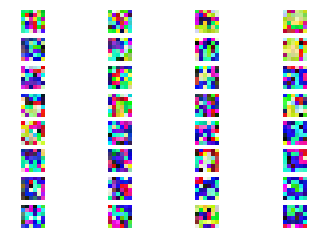

In [12]:
f, ax = plt.subplots(8, 4)
for i in range(32):
    ax[i % 8, i // 8].imshow(C1[:, :, :, i])
    ax[i % 8, i // 8].axis("off")

In [13]:
print 'action:', action_data.shape
print 'action: batch ind 0', action_data[0]
print 'action: batch ind 1', action_data[1]
print 'images:', image_data.shape

# print 'states:', state_data.shape
# print 'states: batch ind 0', state_data[0]
# print 'states: batch ind 1', state_data[1]
# print 'average speed in dir1:', np.average(state_data[:,:,3])
# print 'average speed in dir2:', np.average(state_data[:,:,2])

action: (32, 15, 2)
action: batch ind 0 [[-1.09660304  2.3726542 ]
 [-1.09660304  2.3726542 ]
 [-1.09660304  2.3726542 ]
 [ 0.34766531  1.76531816]
 [ 0.34766531  1.76531816]
 [ 0.34766531  1.76531816]
 [-0.20224048  1.07045984]
 [-0.20224048  1.07045984]
 [-0.20224048  1.07045984]
 [ 0.45157224  1.92845547]
 [ 0.45157224  1.92845547]
 [ 0.45157224  1.92845547]
 [-3.44711494  4.32052326]
 [-3.44711494  4.32052326]
 [-3.44711494  4.32052326]]
action: batch ind 1 [[ 4.13419867 -0.09194441]
 [ 4.13419867 -0.09194441]
 [ 4.13419867 -0.09194441]
 [-4.17799997  0.04224176]
 [-4.17799997  0.04224176]
 [-4.17799997  0.04224176]
 [ 1.63882327  0.01201361]
 [ 1.63882327  0.01201361]
 [ 1.63882327  0.01201361]
 [-2.58292556 -0.55990875]
 [-2.58292556 -0.55990875]
 [-2.58292556 -0.55990875]
 [-1.09122753  0.06413709]
 [-1.09122753  0.06413709]
 [-1.09122753  0.06413709]]
images: (32, 15, 64, 64, 3)


In [14]:
print np.max(image_data)

0.694118


In [15]:
action_data.shape

(32, 15, 2)

(array([  21.,   48.,  108.,  159.,  186.,  192.,  135.,   72.,   33.,    6.]),
 array([-7.92315388, -6.26370926, -4.60426464, -2.94482002, -1.2853754 ,
         0.37406921,  2.03351383,  3.69295845,  5.35240307,  7.01184769,
         8.6712923 ]),
 <a list of 10 Patch objects>)

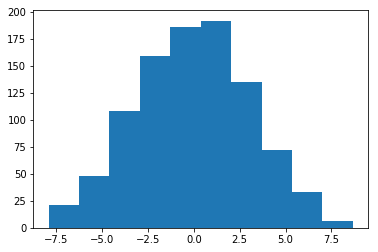

In [16]:
x = action_data.flatten()
plt.hist(x)

In [17]:
np.max(action_data)

8.6712923

In [18]:
np.min(action_data)

-7.9231539

In [19]:
image_data.shape

(32, 15, 64, 64, 3)

In [20]:
I = image_data[:, 0:14, :, :, :] - image_data[0, 1:15, :, :, :]
print I.min(), I.max()

-0.682353 0.584314


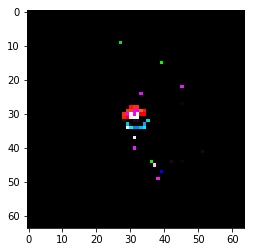

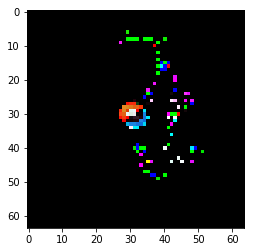

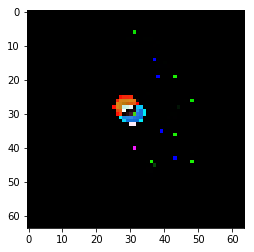

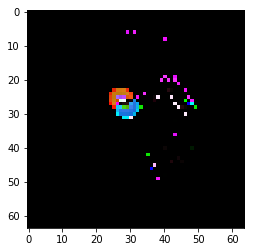

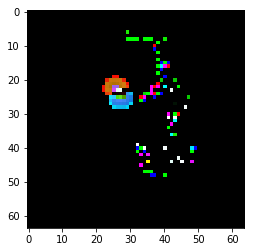

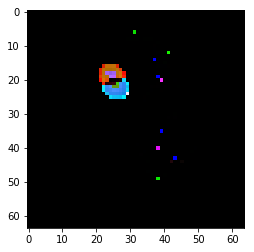

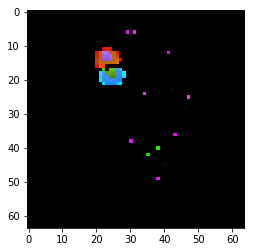

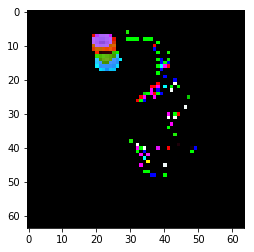

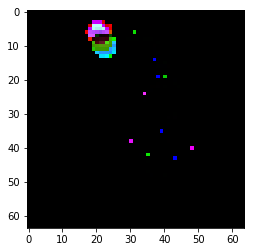

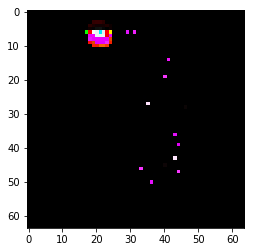

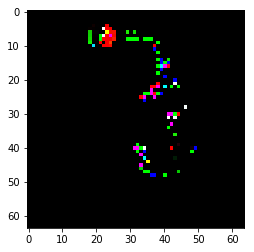

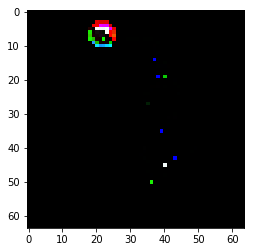

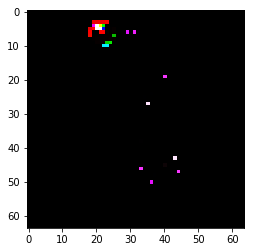

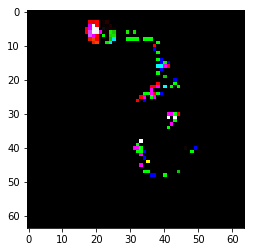

In [21]:
for i in range(14):
    plt.figure()
    plt.imshow(image_data[0, i, :, :, :] - image_data[0, i+1, :, :, :])

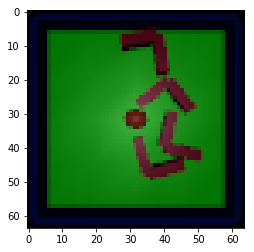

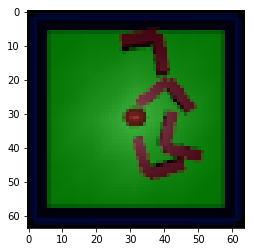

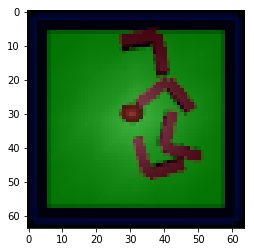

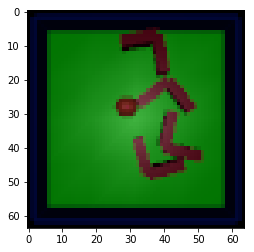

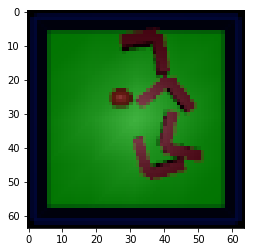

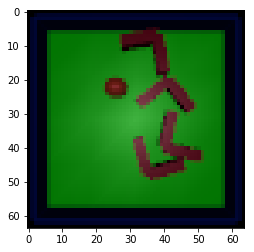

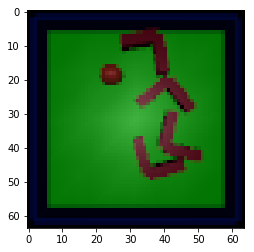

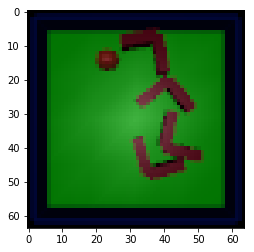

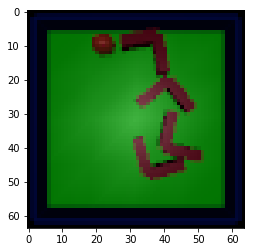

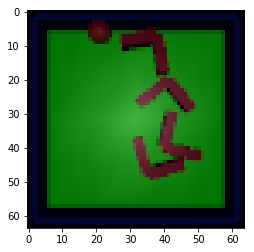

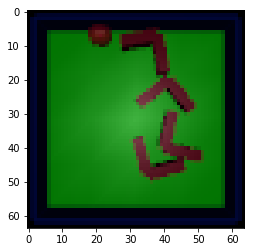

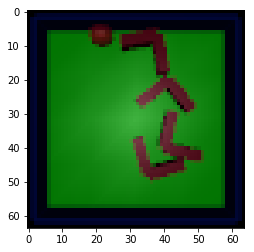

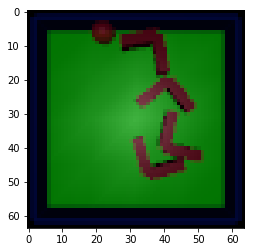

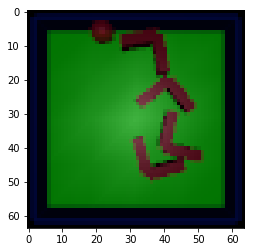

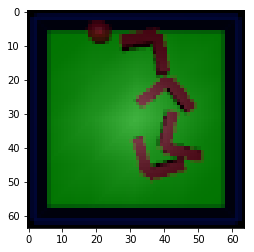

In [22]:
for i in range(15):
    plt.figure()
    plt.imshow(image_data[0, i, :, :, :])

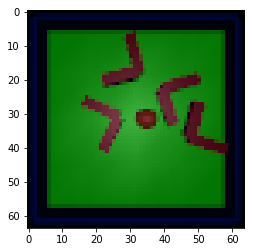

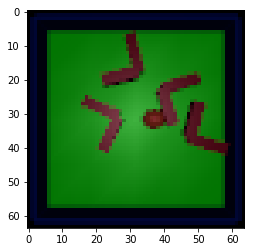

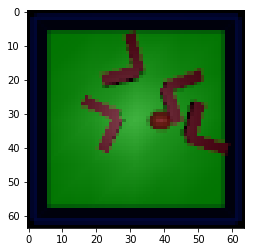

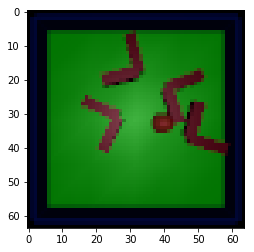

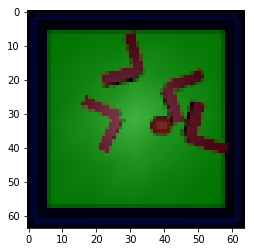

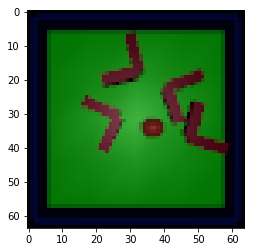

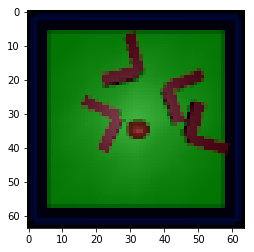

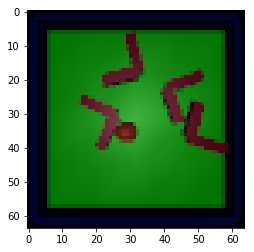

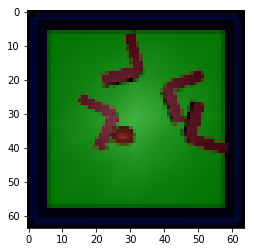

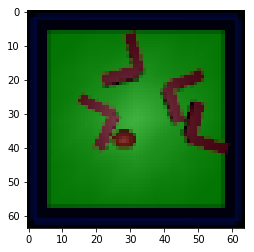

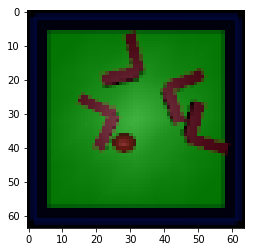

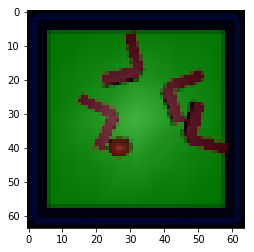

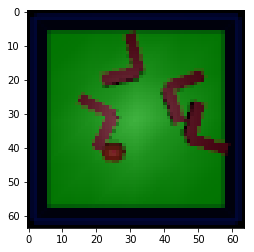

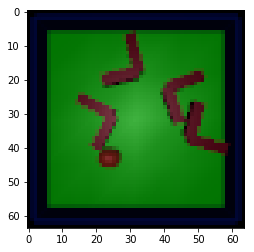

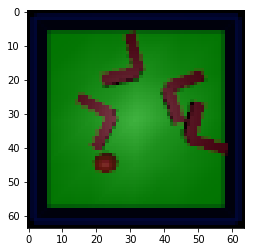

In [23]:
for i in range(15):
    plt.figure()
    plt.imshow(image_data[1, i, :, :, :])

In [24]:
def showable(img):
    image_data

In [25]:
np.min(image_data)

0.0

0.617822
4.90196e-07
(64, 64, 3)


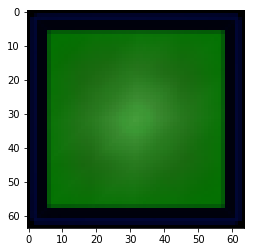

In [27]:
img_mean = np.load('/home/ashvin/lsdc/pushing_data/finer_temporal_resolution_substep10/train/mean.npy')
plt.imshow(img_mean)
img_mean.dtype
print np.max(img_mean)
print np.min(img_mean)
print img_mean.shape

/home/ashvin/tensorflow11/local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


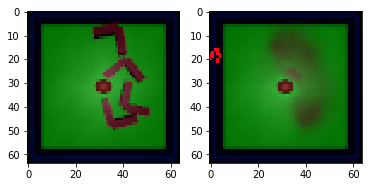

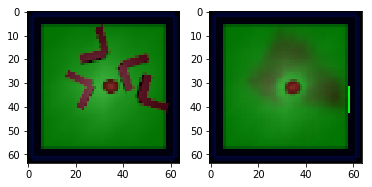

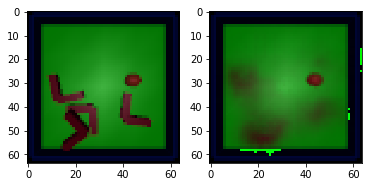

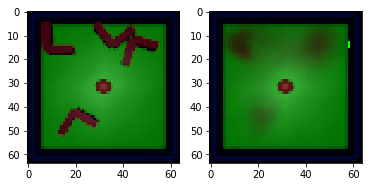

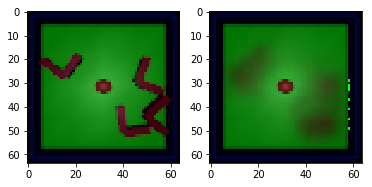

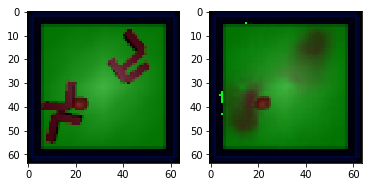

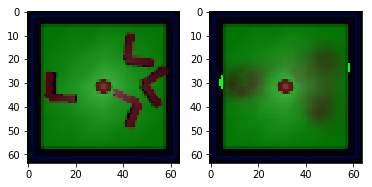

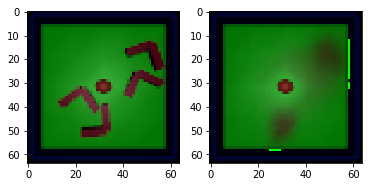

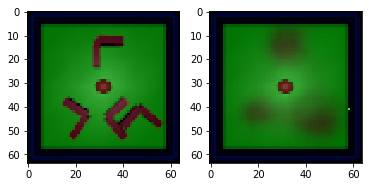

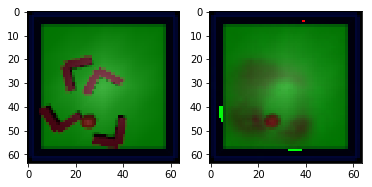

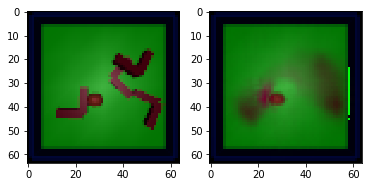

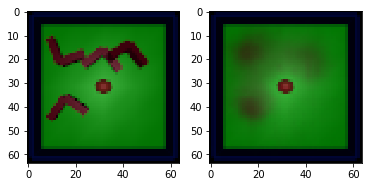

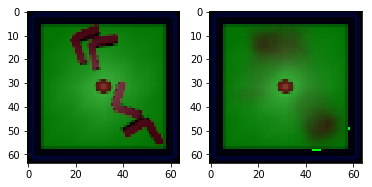

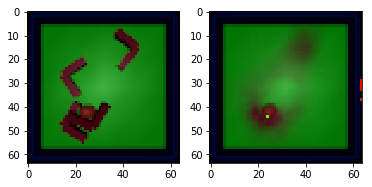

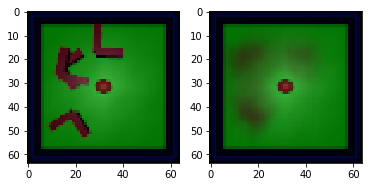

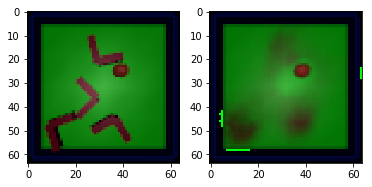

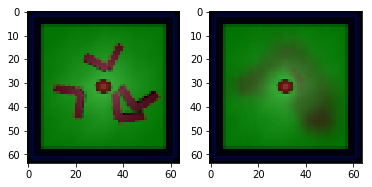

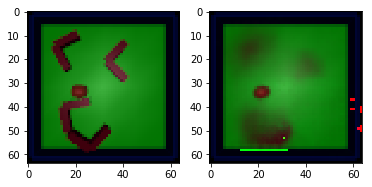

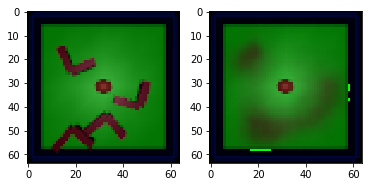

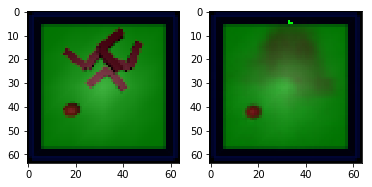

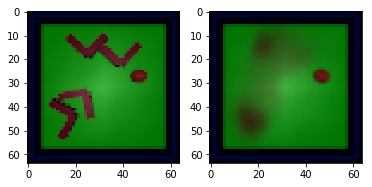

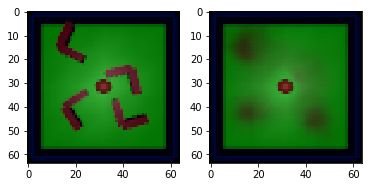

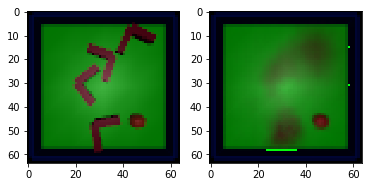

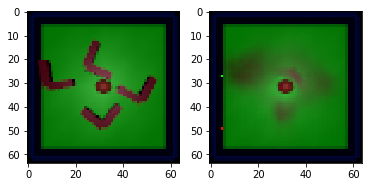

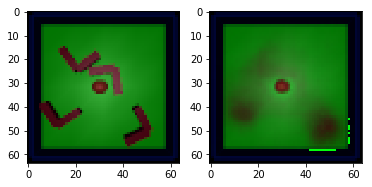

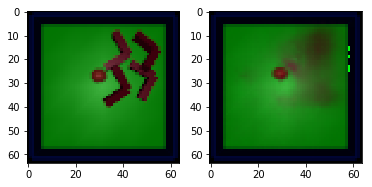

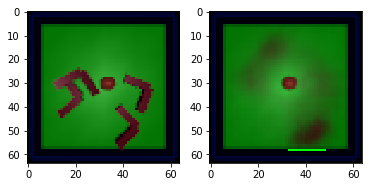

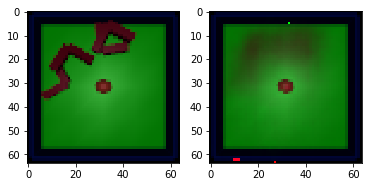

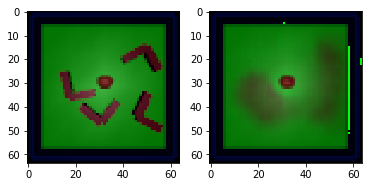

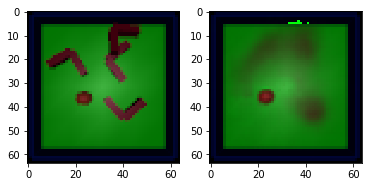

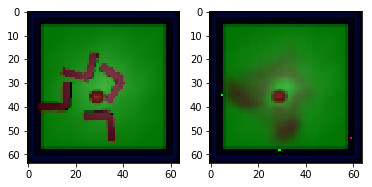

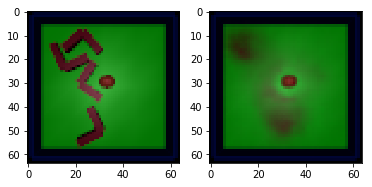

In [28]:
for i in range(32):
    plt.figure()
    f, ax = plt.subplots(1, 2)
    ax[0].imshow(image_data[i, 0, :, :, :])
    ax[1].imshow(reconstruction[i, :, :, :] + img_mean)